Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [2]:
!pip install catboost
!pip install lightgbm
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 41.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 65.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 118.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 106.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import lightgbm as lgb
import time

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
cars_df = pd.read_csv('/datasets/car_data.csv')
display(cars_df)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [38]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245567 entries, 3 to 354367
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        245567 non-null  object
 1   Price              245567 non-null  int64 
 2   VehicleType        245567 non-null  int64 
 3   RegistrationYear   245567 non-null  int64 
 4   Gearbox            245567 non-null  object
 5   Power              245567 non-null  int64 
 6   Model              245567 non-null  int64 
 7   Mileage            245567 non-null  int64 
 8   RegistrationMonth  245567 non-null  int64 
 9   FuelType           245567 non-null  int64 
 10  Brand              245567 non-null  int64 
 11  NotRepaired        245567 non-null  object
 12  DateCreated        245567 non-null  object
 13  NumberOfPictures   245567 non-null  int64 
 14  PostalCode         245567 non-null  int64 
 15  LastSeen           245567 non-null  object
dtypes: int64(11), object

In [39]:
cars_df.shape

(245567, 16)

In [7]:
cars_df.duplicated().sum()

262

In [8]:
cars_df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [9]:
cars_df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [40]:
cars_df.dropna(inplace=True)
cars_df.drop_duplicates(inplace=True)

### Findings:

- 16 columns and 354,369 rows of data
- Date columns will be deleted as they aren't relevant for machine learning: `DateCrawled`, `DateCreated`, `LastSeen`
- `NumberOfPictures` column contains only 0 values, can be deleted
- `RegistrationYear` has a value of 9999 which needs to be deleted
- `Price` column has a significant difference between the mean and median, suggesting some outliers need to be addressed
- Some columns have 0 values that need to be addressed: `Power`, `Price`, `RegestrationMonth`
- `Model` and `Brand` categorical columns has a large number of unique values. We need to consider an approach besides One Hot-Encoding
- We can safely remove 262 duplicate data rows
- Many missing values across multiple columns
- Dropped all rows with missing values. Rows that are missing values are not giving us the full details of the vehicle. Missing information for automobiles that are on sale is unattractive to future customers since buying a vehicle is a big decision in a customer's life. USing accurate information is important. Also, the data does not need to show a automobile exact information twice. Dupes were also deleted.

### Remove Unnecessary Features

In [42]:
target = cars_df['Price']
features = cars_df.drop(['DateCrawled','Price','RegistrationMonth','DateCreated','NumberOfPictures','PostalCode','LastSeen'], axis=1)

In [43]:
features

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
3,5,2001,manual,75,116,150000,6,37,no
4,5,2008,manual,69,101,90000,2,31,no
5,4,1995,manual,102,11,150000,6,2,yes
6,1,2004,manual,109,8,150000,6,25,no
7,4,1980,manual,50,166,40000,6,37,no
...,...,...,...,...,...,...,...,...,...
354360,7,2005,manual,3,11,150000,2,2,no
354362,4,2004,manual,225,140,150000,6,30,yes
354363,0,2000,manual,0,248,150000,6,24,no
354366,1,2000,auto,101,106,125000,6,32,no


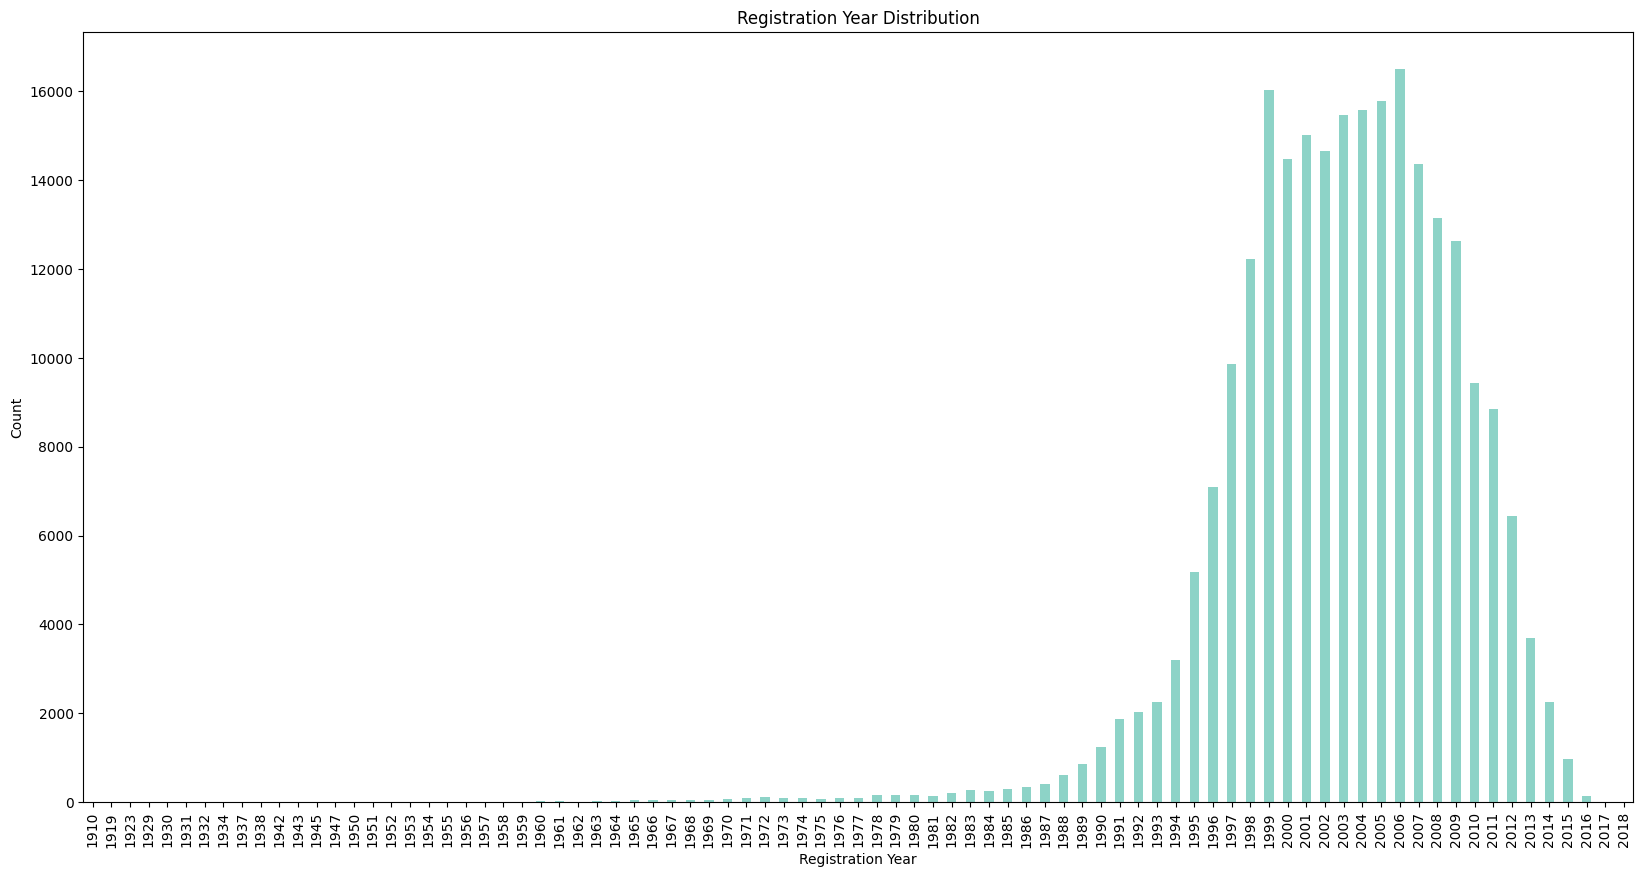

In [44]:
registration_year_counts = cars_df['RegistrationYear'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
registration_year_counts.plot(kind='bar')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.title('Registration Year Distribution')
plt.show()

The majority of cars from this data are from the 2000s and late 90s.

In [45]:
def values(columns):
    total = features[columns].value_counts()
    return total

print(values('Gearbox'))
print()
print(values('NotRepaired'))
print()
print(values('Model'))
print()
print(values('FuelType'))
print()
print(values('Brand'))

manual    194529
auto       51038
Name: Gearbox, dtype: int64

no     217767
yes     27800
Name: NotRepaired, dtype: int64

116    20184
166    18464
11     14877
173     8797
83      8255
       ...  
118        4
202        3
195        3
183        2
185        2
Name: Model, Length: 249, dtype: int64

6    162426
2     78478
4      3903
0       454
3       180
5        73
1        53
Name: FuelType, dtype: int64

37    51787
2     27213
24    26184
20    23902
1     21537
10    17084
27    11623
25     7814
9      6329
30     4903
31     4391
19     3957
5      3659
35     3619
23     3502
32     3344
12     2731
21     2692
38     2478
22     2042
11     1929
15     1886
0      1679
34     1676
3      1280
4      1013
6       721
26      548
33      534
8       520
14      502
18      421
29      417
13      389
7       337
17      309
28      258
36      211
16      146
Name: Brand, dtype: int64


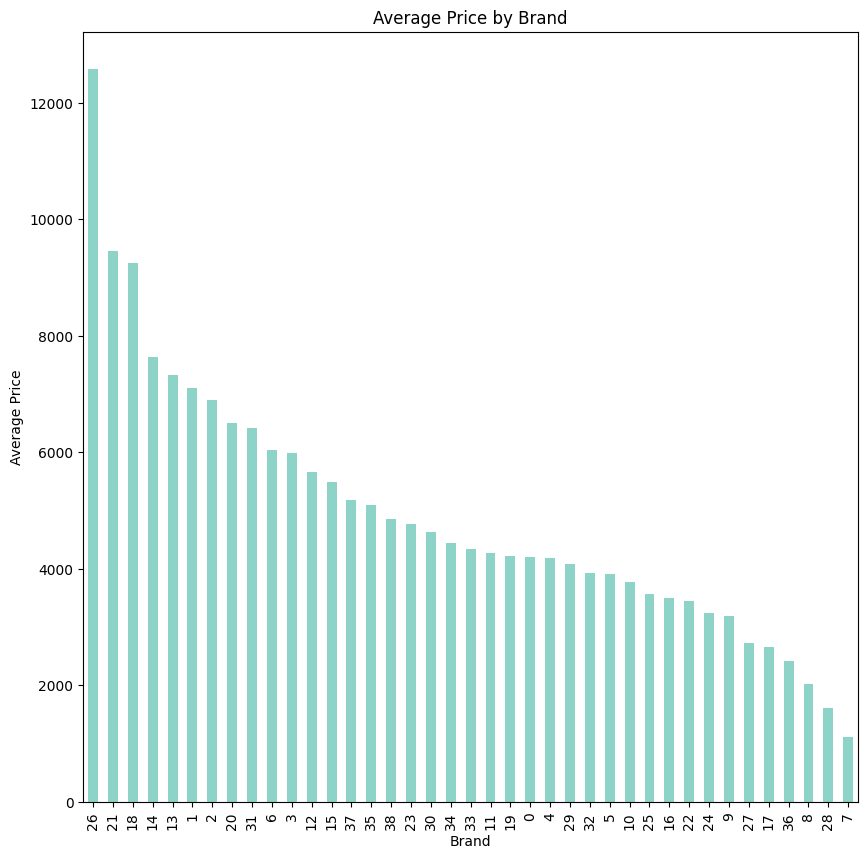

In [46]:
avg_price_by_brand = cars_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 10))
avg_price_by_brand.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.show()

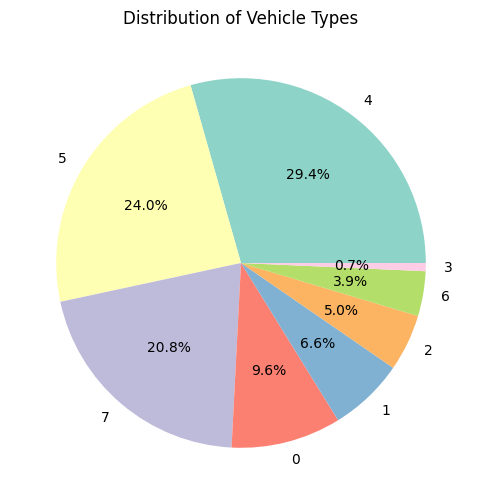

In [47]:
vehicle_type_counts = cars_df['VehicleType'].value_counts()


plt.figure(figsize=(10, 6))
sns.set_palette("Set3")  # Set color palette for the pie chart
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Vehicle Types')


plt.show()

In [48]:
def label(column):
    encoder = LabelEncoder() 
    cars_df[column] = encoder.fit_transform(cars_df[column])  

    return cars_df[column]


vehicle_type_encoded = label('VehicleType')
brand_encoded = label('Brand')
model_encoded = label('Model')
fuel_type_encoded = label('FuelType')

features['VehicleType'] = vehicle_type_encoded
features['Brand'] = brand_encoded
features['Model'] = model_encoded
features['FuelType'] = fuel_type_encoded

In [49]:
def onehot(column):
    encoder = OneHotEncoder(sparse=False)  # Set sparse=False to get a dense array
    encoded_column = encoder.fit_transform(cars_df[[column]])  # Pass column as a list to get a 2D array

    return encoded_column

gearbox_encoded = onehot('Gearbox')
not_repaired_encoded = onehot('NotRepaired')

features['Gearbox'] = gearbox_encoded
features['NotRepaired'] = not_repaired_encoded

In [50]:
features

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
3,5,2001,0.0,75,116,150000,6,37,1.0
4,5,2008,0.0,69,101,90000,2,31,1.0
5,4,1995,0.0,102,11,150000,6,2,0.0
6,1,2004,0.0,109,8,150000,6,25,1.0
7,4,1980,0.0,50,166,40000,6,37,1.0
...,...,...,...,...,...,...,...,...,...
354360,7,2005,0.0,3,11,150000,2,2,1.0
354362,4,2004,0.0,225,140,150000,6,30,0.0
354363,0,2000,0.0,0,248,150000,6,24,1.0
354366,1,2000,1.0,101,106,125000,6,32,1.0


We can now create regression models die to all data being numerical and encoded.

## Model training

In [51]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.25,
                                                                           random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(features_train,target_train,test_size=.3,
                                                                             random_state=12345)

In [52]:
scaler = StandardScaler()
numeric = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Power','Model', 'Mileage', 'FuelType', 'Brand', 'NotRepaired']
scaler.fit_transform(features_train)

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])



print(features_train[numeric])
print(features_valid[numeric])
print(features_test[numeric])

        VehicleType  RegistrationYear  Gearbox     Power     Model   Mileage  \
267550     0.347780         -0.475752 -0.51216 -0.844102 -0.465193  0.610817   
129278    -0.120902          0.173195 -0.51216 -0.106868  0.112062  0.610817   
137133     0.347780         -0.313515 -0.51216 -0.844102 -0.352558  0.610817   
214342    -0.120902         -0.637989 -0.51216 -0.036655  0.112062  0.610817   
287436     1.285144         -0.800226 -0.51216 -0.317506 -0.141367 -0.063721   
...             ...               ...      ...       ...       ...       ...   
333253     0.816462          0.335432 -0.51216  0.209090  0.816031 -1.008075   
111966    -0.120902          0.822142 -0.51216 -0.029634 -1.056527 -1.277891   
304018    -0.120902         -0.800226 -0.51216 -0.212187  0.647078  0.610817   
344155    -0.120902          0.497669 -0.51216 -0.078783 -1.056527  0.610817   
214476     1.285144         -0.151279 -0.51216  0.138877  1.731191  0.610817   

        FuelType     Brand  NotRepaired

In [53]:
model = LinearRegression()


start_time = time.time()
model.fit(features_train, target_train)
training_timelr = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timelr = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_lr = np.sqrt(mse)
r_squaredlr = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredlr)
print("RMSE:", rmse_lr)
print("Training Time:", training_timelr)
print("Prediction Time:", prediction_timelr)

R-squared: 0.4822173942973971
RMSE: 3390.838373602615
Training Time: 0.014585733413696289
Prediction Time: 0.001972198486328125


In [54]:
model = RandomForestRegressor(max_depth=35, random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timerf = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timerf = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_rf = np.sqrt(mse)
r_squaredrf = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredrf)
print("RMSE:", rmse_rf)
print("Training Time:", training_timerf)
print("Prediction Time:", prediction_timerf)

R-squared: 0.8721339415361609
RMSE: 1685.043046783114
Training Time: 22.640489101409912
Prediction Time: 1.5359537601470947


In [55]:
model = RandomForestRegressor(n_estimators=50,max_depth=25,random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timerf2 = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timerf2 = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_rf2 = np.sqrt(mse)
r_squaredrf2 = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredrf2)
print("RMSE:", rmse_rf2)
print("Training Time:", training_timerf2)
print("Prediction Time:", prediction_timerf2)

R-squared: 0.8717958937538888
RMSE: 1687.2690052587964
Training Time: 11.442209005355835
Prediction Time: 0.6703648567199707


In [56]:
model = GradientBoostingRegressor(n_estimators=50, max_depth=25, random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timegb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timegb = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_gb = np.sqrt(mse)
r_squaredgb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredgb)
print("RMSE:", rmse_gb)
print("Training Time:", training_timegb)
print("Prediction Time:", prediction_timegb)

R-squared: 0.8244739590174359
RMSE: 1974.2590598978943
Training Time: 19.322874069213867
Prediction Time: 0.678041934967041


## Model analysis

In [57]:
train_data = lgb.Dataset(features_train, label=target_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 90,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


start_time = time.time()
model = lgb.train(params, train_data, num_boost_round=100)
training_timelgb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timelgb = time.time() - start_time

rmse_lgb = np.sqrt(mean_squared_error(target_valid, model_predict))
r_squaredlgb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredlgb)
print("RMSE:", rmse_lgb)
print("Training Time:", training_timelgb)
print("Prediction Time:", prediction_timelgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
R-squared: 0.877524511182667
RMSE: 1649.141617906724
Training Time: 2.6777994632720947
Prediction Time: 0.39309024810791016


In [58]:
model = CatBoostRegressor(iterations=200,
                          learning_rate=0.1,
                          depth=6,
                          l2_leaf_reg=3,
                          random_seed=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timecb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timecb = time.time() - start_time

rmse_cb = np.sqrt(mean_squared_error(target_valid, model_predict))
r_squaredcb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredcb)
print("RMSE:", rmse_cb)
print("Training Time:", training_timecb)
print("Prediction Time:", prediction_timecb)

0:	learn: 4405.4882266	total: 14.4ms	remaining: 2.86s
1:	learn: 4132.8303608	total: 28.8ms	remaining: 2.85s
2:	learn: 3882.5900171	total: 42.5ms	remaining: 2.79s
3:	learn: 3669.1405734	total: 55.7ms	remaining: 2.73s
4:	learn: 3477.6315367	total: 72ms	remaining: 2.81s
5:	learn: 3309.3074497	total: 85.8ms	remaining: 2.77s
6:	learn: 3164.7321672	total: 99.5ms	remaining: 2.74s
7:	learn: 3040.6203055	total: 113ms	remaining: 2.71s
8:	learn: 2929.8629576	total: 126ms	remaining: 2.67s
9:	learn: 2831.3649503	total: 140ms	remaining: 2.65s
10:	learn: 2744.4125536	total: 153ms	remaining: 2.63s
11:	learn: 2669.3691905	total: 168ms	remaining: 2.63s
12:	learn: 2602.1375312	total: 181ms	remaining: 2.61s
13:	learn: 2544.2023623	total: 194ms	remaining: 2.58s
14:	learn: 2493.8871093	total: 208ms	remaining: 2.56s
15:	learn: 2445.2716350	total: 222ms	remaining: 2.55s
16:	learn: 2405.3236253	total: 235ms	remaining: 2.53s
17:	learn: 2371.0892054	total: 248ms	remaining: 2.51s
18:	learn: 2342.1916974	total: 26

156:	learn: 1787.9294417	total: 2.1s	remaining: 574ms
157:	learn: 1787.2207477	total: 2.11s	remaining: 561ms
158:	learn: 1786.5370045	total: 2.12s	remaining: 547ms
159:	learn: 1786.2165214	total: 2.13s	remaining: 534ms
160:	learn: 1785.8677536	total: 2.15s	remaining: 521ms
161:	learn: 1784.6808790	total: 2.16s	remaining: 507ms
162:	learn: 1784.1249356	total: 2.18s	remaining: 494ms
163:	learn: 1783.4228706	total: 2.19s	remaining: 481ms
164:	learn: 1782.3361948	total: 2.2s	remaining: 467ms
165:	learn: 1781.1481071	total: 2.22s	remaining: 454ms
166:	learn: 1780.6542296	total: 2.23s	remaining: 441ms
167:	learn: 1780.0797960	total: 2.25s	remaining: 428ms
168:	learn: 1779.5517632	total: 2.26s	remaining: 414ms
169:	learn: 1778.3847282	total: 2.27s	remaining: 401ms
170:	learn: 1777.7252991	total: 2.29s	remaining: 388ms
171:	learn: 1777.0316318	total: 2.3s	remaining: 375ms
172:	learn: 1776.5590592	total: 2.31s	remaining: 361ms
173:	learn: 1775.8208161	total: 2.33s	remaining: 348ms
174:	learn: 1

In [59]:
modelperformance = pd.DataFrame({'model': ['LinearRegression', 'RandomForestRegressor','RandomForestRegressor 2nd Model', 'Gradient Booster Regressor',
                                           'LightGBM','CatBoostRegressor'],
              'RMSE': [rmse_lr,rmse_rf,rmse_rf2,rmse_gb,rmse_lgb,rmse_cb],
              'R2': [r_squaredlr,r_squaredrf,r_squaredrf2,r_squaredgb,r_squaredlgb,r_squaredcb],
              'Training Time': [training_timelr,training_timerf,r_squaredrf2,training_timegb,training_timelgb,training_timecb],
              'Prediction Time': [prediction_timelr,prediction_timerf,prediction_timerf2,prediction_timegb,prediction_timelgb,prediction_timecb]})

modelperformance

,model,RMSE,R2,Training Time,Prediction Time
0,LinearRegression,3390.838374,0.482217,0.014586,0.001972
1,RandomForestRegressor,1685.043047,0.872134,22.640489,1.535954
2,RandomForestRegressor 2nd Model,1687.269005,0.871796,0.871796,0.670365
3,Gradient Booster Regressor,1974.259060,0.824474,19.322874,0.678042
4,LightGBM,1649.141618,0.877525,2.677799,0.393090
5,CatBoostRegressor,1779.300239,0.857429,2.851811,0.011730


The RMSE score is a useful way to see how well a model is able to fit a dataset. The larger the RMSE, the larger the difference between the predicted and observed values, which means the worse a model fits the data. Conversely, the smaller the RMSE, the better a model is able to fit the data. It can be particularly useful to compare the RMSE of two different models with each other to see which model fits the data better. From the analysis done, the LightGBM had the lowest RMSE score and around 2-3 seconds to train. Therefore, LightGBM will be used for final testing on the test set.

In [60]:
train_data = lgb.Dataset(features_train, label=target_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 90,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


start_time = time.time()
model = lgb.train(params, train_data, num_boost_round=100)
training_timelgb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_test)
prediction_timelgb = time.time() - start_time

rmse_lgb = np.sqrt(mean_squared_error(target_test, model_predict))
r_squaredlgb = r2_score(target_test, model_predict)

print("R-squared:", r_squaredlgb)
print("RMSE:", rmse_lgb)
print("Training Time:", training_timelgb)
print("Prediction Time:", prediction_timelgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
R-squared: 0.8771654426214248
RMSE: 1655.691565402903
Training Time: 2.593111038208008
Prediction Time: 0.39958667755126953


# Conclusion

The project was started with data exploration and removing duplicates, missing value rows of data and determining what data to use for features to find the target, price of the vehicle. We droppped missing values because the features were any column that represented any sort of variable that would affect the price. Duplicates were dropped since the model didn't recognize the same vehicle with the same features. The features and target were then explored with graphical representations including bar charts, and pie charts that displayed their distributions.

We used Linear Regression, Random Forest, Gradient Boosting Regression, LightGBM, and Cat Boot Regressor models were used for validaiton. After training, LightGBM had the lowest RMSE with a 2.85 second training time and less than 1 second prediction time. The model showed high quality results with short time to train.